In [3]:
#importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [10]:
#LOADING WINE DATASET
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url,sep=';')
df.head()
print("Wine quality :- ")
df["quality"].unique()

Wine quality :- 


array([5, 6, 7, 4, 8, 3])

In [15]:
# Simplify quality to 3 classes for clear classification
df['quality_class'] = pd.cut(df['quality'], bins=[2, 5, 6, 8], labels=[0, 1, 2])
#pd.cut() will convert the values of "quality" 3 main classes
#here bins give a range --- [2,8] --- 8 is included
# 2 <= value < 5 ---> 0
# 5 <= value < 6 ---> 1
# 6 <= values <= 8 ---> 2
# 0=Low, 1=Medium, 2=High
#values outside bound [2,8] will be = NaN
X = df.drop(['quality','quality_class'],axis=1).values # for training removing the quality column
y = df['quality_class'].values #target
#spliting data
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=34
)

#normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (1279, 11)
Test set shape: (320, 11)


In [17]:
# Initialize and fit KNN
#using Use KNeighborsClassifier from sklearn.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Quick accuracy check
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy with K=5: {accuracy:.2f}")


Initial Accuracy with K=5: 0.59


K=1, Accuracy: 0.67
K=3, Accuracy: 0.59
K=5, Accuracy: 0.59
K=7, Accuracy: 0.58
K=9, Accuracy: 0.60


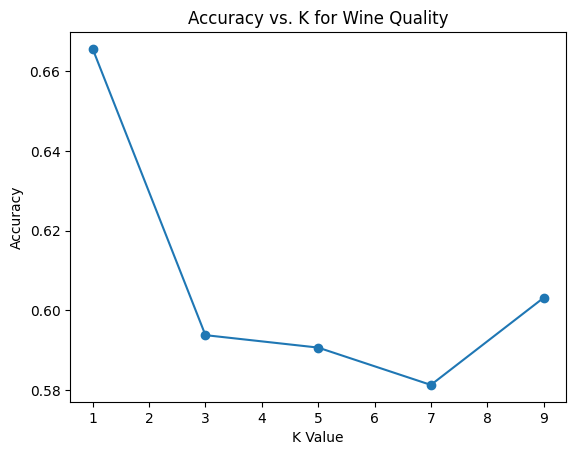

In [18]:
# Experiment with K values
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy: {acc:.2f}")

# Plot accuracies vs K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for Wine Quality')
plt.show()


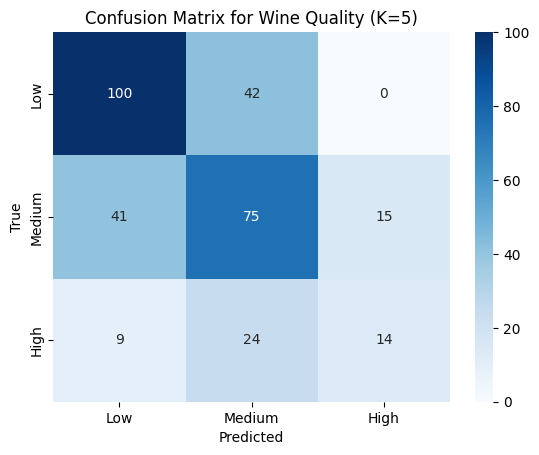

In [19]:
#Evaluate model using accuracy, confusion matrix.
# Confusion matrix for K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix for Wine Quality (K=5)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


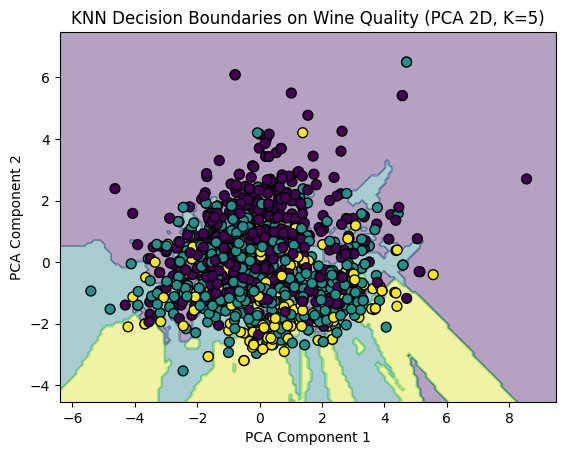

In [5]:
# PCA to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit KNN on PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Meshgrid for boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('KNN Decision Boundaries on Wine Quality (PCA 2D, K=5)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


/tmp/ipython-input-3877493046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_class', data=df, palette='viridis')


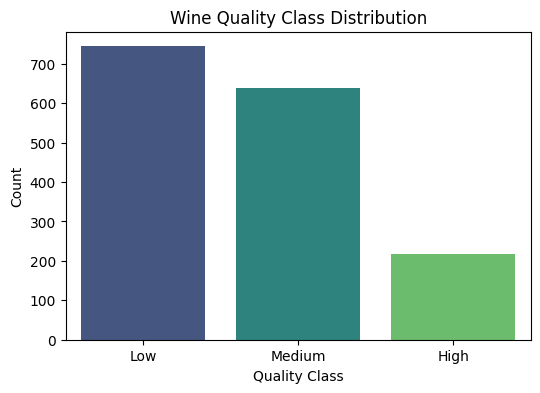

In [6]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='quality_class', data=df, palette='viridis')
plt.xticks([0,1,2], ['Low', 'Medium', 'High'])
plt.title('Wine Quality Class Distribution')
plt.xlabel('Quality Class')
plt.ylabel('Count')
plt.show()


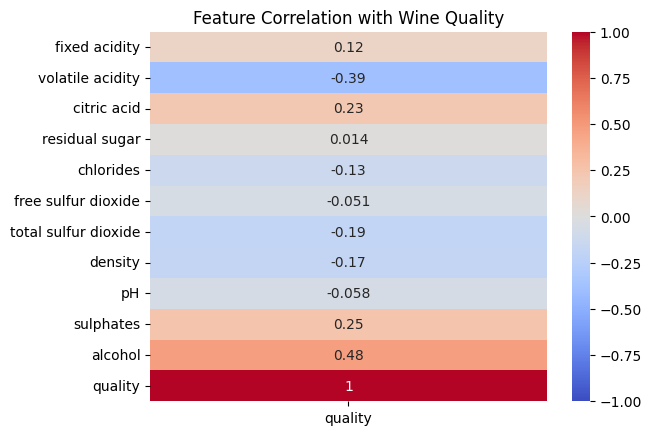

In [7]:
# Correlation heatmap with quality
corr = df.drop('quality_class', axis=1).corr()
sns.heatmap(corr[['quality']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Wine Quality')
plt.show()
